# **Project Name**    - Sentiment Analysis of IMDB Movie Reviews 

##### **Project Type**    - classification
##### **Industry**    - Damsole Technologies Pvt ltd
##### **Name -**  - Sachin Wadkar
##### **Level -** - 4
##### **Task -** - Sentiment Analysis of IMDB Movie Reviews 

# **Project Summary -**

**IMDb (Internet Movie Database)** is an online database of information related to films, television programs, home videos, video games, and streaming content online – including cast, production crew and personal biographies, plot summaries, trivia, fan and critical reviews, and ratings. An additional fan feature, message boards, was abandoned in February 2017. Originally a fan-operated website, the database is owned and operated by IMDb.com, Inc., a subsidiary of Amazon.
By late 1990, the lists included almost 10,000 movies and television series correlated with actors and actresses appearing therein. On October 17, 1990, Needham developed and posted a collection of Unix shell scripts which could be used to search the four lists, and thus the database that would become the IMDb was born.At the time, it was known as the `rec.arts.movies movie database`.
Internet Movie Database users are invited to participate in the site's ever-growing wealth of information by rating movies on a rating scale.
The labeled dataset consists of 50,000 IMDB movie reviews. No individual movie has more than 30 reviews. The 25,000 reviews labeled training set does not include any of the same movies as the 25,000 review test set. 


##### *There are three columns in the movie review dataset:*
* Id
*	Review 
*	Sentiment

##### *There are two classes in the movie review dataset:*
*	1 : >= 7 rating
*	0: <5 rating


# **Problem Statement**

#### Perform Sentiment analysis on movie reviews to determine if the sentiment is positive or negative.

#### *This project explores the applicability of machine learning based classification techniques:*
1.	Logistic Regression
2.	Decision Tree
3.	Random Forest 
4.	Gaussian Naïve Bayes & Multinomial Naïve Bayes
5.	K-Nearest Neighbor
6.	SMV – Support Vector Machine

We are going to determine that feature selection improves the performance of sentiment based classification, but it depends on the method adopted and the number of feature selected. The experimental results presented in this project show that Logistic Regression performs better than other techniques for sentiment based classification.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
# Importing Numpy & Pandas for data processing & data wrangling
import numpy as np
import pandas as pd

# Importing  tools for visualization
import matplotlib.pyplot as plt
import seaborn as sns

import re

# Library used for ignore warnings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Dataset Loading

In [2]:
# Load Dataset 
df = pd.read_csv("IMDB Dataset.csv")

In [3]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


### Dataset Information

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [5]:
# Dataset Duplicate Value Count
dup = df.duplicated().sum()
print(f'number of duplicated rows are {dup}')

number of duplicated rows are 418


In [6]:
# Missing Values/Null Values Count
df.isnull().sum()

review       0
sentiment    0
dtype: int64

## ***2. Understanding The Variables***

In [7]:
# Dataset Columns
df.columns

Index(['review', 'sentiment'], dtype='object')

In [8]:
# Dataset Describe (all columns included)
df.describe(include= 'all').round(2)

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [9]:
# Check Unique Values for each variable using a for loop.
for i in df.columns.tolist():
  print("No. of unique values in",i,"is",df[i].nunique())

No. of unique values in review is 49582
No. of unique values in sentiment is 2


In [10]:
# Create a binary 'Spam' column: 1 for 'spam' and 0 for 'ham', based on the 'Category' column.
df['numricsentiment'] = df['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)

In [11]:
df['numricsentiment'].value_counts()

numricsentiment
1    25000
0    25000
Name: count, dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   review           50000 non-null  object
 1   sentiment        50000 non-null  object
 2   numricsentiment  50000 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.1+ MB


In [13]:
# Missing Values/Null Values Count
df.isnull().sum()

review             0
sentiment          0
numricsentiment    0
dtype: int64

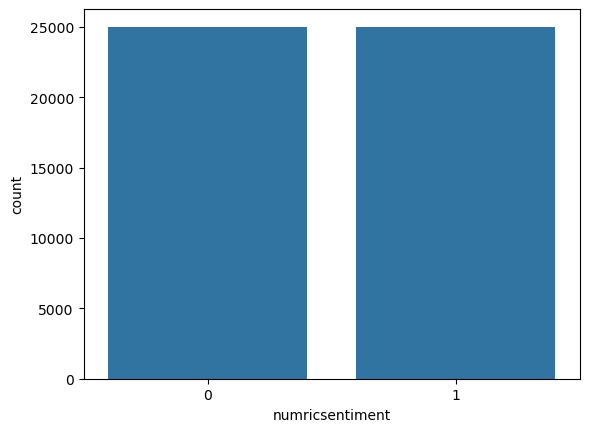

In [14]:
sns.countplot(x='numricsentiment',data = df)
plt.show()

We have a balanced dataset with **25000 labeled 1** observations and **25000 labeled 0** observations.

## Step 1: Data Clean up

In [15]:
def preprocessor(text):
    """ Return a cleaned version of text
    """
    # Remove HTML markup
    text = re.sub('<[^>]*>', '', text)
    # Save emoticons for later appending
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text)
    # Remove any non-word character and append the emoticons,
    # removing the nose character for standarization. Convert to lower case
    text = (re.sub('[\W]+', ' ', text.lower()) + ' ' + ' '.join(emoticons).replace('-', ''))
    
    return text

In [16]:
from nltk.stem import PorterStemmer

porter = PorterStemmer()

def tokenizer_porter(text):
    token = []
    for word in text.split():
        token.append(porter.stem(word))
    
    return token

## Step 2: Representation

In [17]:
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import TfidfVectorizer

import nltk
from nltk.corpus import stopwords

from sklearn.model_selection import train_test_split

X = df['review'] 
y = df['numricsentiment']

my_additional_stop_words = {'someword', 'somewor'} 
stop = list(text.ENGLISH_STOP_WORDS.union(my_additional_stop_words))

tfidf = TfidfVectorizer(stop_words=stop, tokenizer=tokenizer_porter, preprocessor=preprocessor)

X_tfidf = tfidf.fit_transform(X)

# split the dataset in train and test
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.3, random_state = 101)

In [18]:
X_train 

<35000x73530 sparse matrix of type '<class 'numpy.float64'>'
	with 3220501 stored elements in Compressed Sparse Row format>

## Step 3: Classification

We train our algorithm by several models

### Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()

clf.fit(X_train, y_train)

LogisticRegression()

In [20]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Now apply those above metrics to evaluate your model
predictions = clf.predict(X_test)

print('The accuracy score is:',accuracy_score(y_test,predictions))
print('The confusion matrix is:','\n',confusion_matrix(y_test,predictions))
print('The classification report is:','\n',classification_report(y_test,predictions))


The accuracy score is: 0.8909333333333334
The confusion matrix is: 
 [[6573  901]
 [ 735 6791]]
The classification report is: 
               precision    recall  f1-score   support

           0       0.90      0.88      0.89      7474
           1       0.88      0.90      0.89      7526

    accuracy                           0.89     15000
   macro avg       0.89      0.89      0.89     15000
weighted avg       0.89      0.89      0.89     15000



### Decision Tree

In [21]:
from sklearn.tree import DecisionTreeClassifier

In [22]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [23]:
dtc_predictions = dtc.predict(X_test)

In [24]:
print('The accuracy score is:',accuracy_score(y_test,dtc_predictions))
print('The confusion matrix is:','\n',confusion_matrix(y_test,dtc_predictions))
print('The classification report is:','\n',classification_report(y_test,dtc_predictions))

The accuracy score is: 0.7244
The confusion matrix is: 
 [[5405 2069]
 [2065 5461]]
The classification report is: 
               precision    recall  f1-score   support

           0       0.72      0.72      0.72      7474
           1       0.73      0.73      0.73      7526

    accuracy                           0.72     15000
   macro avg       0.72      0.72      0.72     15000
weighted avg       0.72      0.72      0.72     15000



### Random Forest

**Baseline Model**

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [27]:
rfc_predictions = rfc.predict(X_test)

In [28]:
print('The accuracy score is:',accuracy_score(y_test,rfc_predictions))
print('The confusion matrix is:','\n',confusion_matrix(y_test,rfc_predictions))
print('The classification report is:','\n',classification_report(y_test,rfc_predictions))

The accuracy score is: 0.8516
The confusion matrix is: 
 [[6424 1050]
 [1176 6350]]
The classification report is: 
               precision    recall  f1-score   support

           0       0.85      0.86      0.85      7474
           1       0.86      0.84      0.85      7526

    accuracy                           0.85     15000
   macro avg       0.85      0.85      0.85     15000
weighted avg       0.85      0.85      0.85     15000



**Tunning Model**

[0.6420000622744325, 0.7173430738304246, 0.751742889391522, 0.7884571131231621, 0.7985713719144162, 0.8187143882783824, 0.831828627482138, 0.8449999883180336, 0.8491429034284944, 0.8536857801711655, 0.8578286316063375]


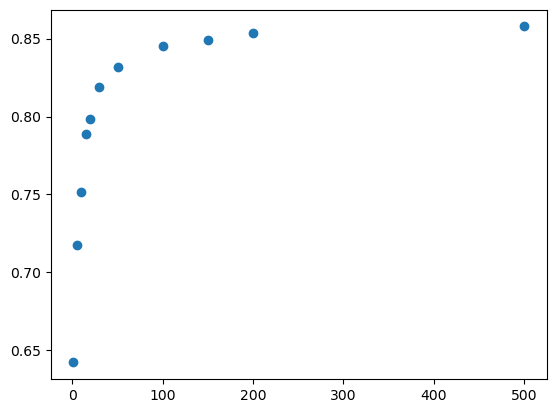

In [29]:
#K-fold cross validation should be used to tune the model
from sklearn.model_selection import cross_val_score

n = [1 ,5 ,10, 15, 20, 30, 50, 100, 150, 200, 500]
val_results = []

for i in n:
    clf = RandomForestClassifier(n_estimators=i)
    val_results.append(cross_val_score(clf, X_train, y_train,cv=3).mean())
    
plt.scatter(n, val_results)
print(val_results)

In [30]:
final_rfc = RandomForestClassifier(n_estimators=200)

final_rfc.fit(X_train, y_train)
final_predictions = final_rfc.predict(X_test)

In [31]:
print('The accuracy score is:',accuracy_score(y_test,final_predictions))
print('The confusion matrix is:','\n',confusion_matrix(y_test,final_predictions))
print('The classification report is:','\n',classification_report(y_test,final_predictions))

The accuracy score is: 0.8582
The confusion matrix is: 
 [[6445 1029]
 [1098 6428]]
The classification report is: 
               precision    recall  f1-score   support

           0       0.85      0.86      0.86      7474
           1       0.86      0.85      0.86      7526

    accuracy                           0.86     15000
   macro avg       0.86      0.86      0.86     15000
weighted avg       0.86      0.86      0.86     15000



### Gaussian Naive Bayes

**Gaussian Naive Bayes** is a good classification for text. The asumption is that the features follow the Gaussian distribution (normal distribution). We do not achive good model because our data's features do not follow the Gaussian distribution.

In [32]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB

gnb = MultinomialNB()

gnb.fit(X_train, y_train)

gnb_predictions = gnb.predict(X_test)

print('The accuracy score is:',accuracy_score(y_test,gnb_predictions))
print('The confusion matrix is:','\n',confusion_matrix(y_test,gnb_predictions))
print('The classification report is:','\n',classification_report(y_test,gnb_predictions))

The accuracy score is: 0.8556666666666667
The confusion matrix is: 
 [[6540  934]
 [1231 6295]]
The classification report is: 
               precision    recall  f1-score   support

           0       0.84      0.88      0.86      7474
           1       0.87      0.84      0.85      7526

    accuracy                           0.86     15000
   macro avg       0.86      0.86      0.86     15000
weighted avg       0.86      0.86      0.86     15000



### KNN (K Nearest Neighbors)

In [33]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
### Tuning using K-fold Cross Validation

from sklearn.model_selection import cross_val_score

val_error_rate = []
neighbors_range = range(1,500,5)

for i in neighbors_range:
    
    knn = KNeighborsClassifier(n_neighbors=i)
    
    val_error = 1 - cross_val_score(knn, X_train, y_train,cv=5).mean()
    val_error_rate.append(val_error)

# Plot settings
plt.figure(figsize=(15,7))
plt.plot(neighbors_range, val_error_rate, color='orange', linestyle='dashed', marker='o',
         markerfacecolor='black', markersize=5, label='Validation Error')
plt.xticks(np.arange(neighbors_range.start, neighbors_range.stop, neighbors_range.step), rotation=60)
plt.grid()
plt.legend()
plt.title('Validation Error vs. K Value')
plt.xlabel('K')
plt.ylabel('Validation Error')
plt.show()

In [ ]:
best_k = neighbors_range[val_error_rate.index(min(val_error_rate))]
best_k

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
knn_predictions = knn.predict(X_test)

print('The accuracy score is:',accuracy_score(y_test,knn_predictions))
print('The classification report is:','\n',classification_report(y_test,knn_predictions))

matrix=confusion_matrix(y_test,knn_predictions)
plt.figure(figsize = (5,4))
sns.heatmap(matrix, annot=True, fmt = '.2f')

### SVM (Support Vector Machine)

In [ ]:
from sklearn.svm import SVC

In [ ]:
from sklearn.model_selection import cross_val_score

val_rate = []
c_range =  range(1,200,20)

for i in c_range:
    
    svm = SVC(C=i, kernel='linear')
    
    val_error = 1 - cross_val_score(svm, X_train, y_train,cv=5).mean()
    val_rate.append(val_error)


# Plot settings
plt.figure(figsize=(15,7))
plt.plot(c_range, val_rate, color='orange', linestyle='dashed', marker='o',
         markerfacecolor='black', markersize=5, label='Validation Error')

plt.xticks(np.arange(c_range.start, c_range.stop, c_range.step), rotation=60)
plt.grid()
plt.legend()
plt.title('Validation Error vs. C Value')
plt.xlabel('C')
plt.ylabel('Validation Error')
plt.show()

In [ ]:
best_c = c_range[val_rate.index(min(val_rate))]
best_c

**Perform SVM with C = 1 and C = 3**

In [ ]:
svm = SVC(kernel='linear',C=1).fit(X_train, y_train)

In [ ]:
svm.fit(X_train, y_train)

In [ ]:
pred = svm.predict(X_test)

In [ ]:
print('The accuracy score is:',accuracy_score(y_test, pred))
print('The confusion matrix is:','\n',confusion_matrix(y_test, pred))
print('The classification report is:','\n',classification_report(y_test, pred))

In [ ]:
svm = SVC(kernel='linear',C=3).fit(X_train, y_train)

In [ ]:
svm.fit(X_train, y_train)

In [ ]:
pred = svm.predict(X_test)

In [ ]:
print('The accuracy score is:',accuracy_score(y_test, pred))
print('The confusion matrix is:','\n',confusion_matrix(y_test, pred))
print('The classification report is:','\n',classification_report(y_test, pred))

## Step 4: Performing Features Selection
### Selecting features by Chi2

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn.feature_selection import VarianceThreshold

# Reshape X_train, X_test by fit_transform
X_new_train = SelectKBest(chi2, k=45000).fit_transform(X_train, y_train)
X_new_test = SelectKBest(chi2, k=45000).fit_transform(X_test, y_test)

# Build Logistic Regression Model and check accuracy
clf.fit(X_new_train, y_train)

new_predictions = clf.predict(X_new_test)

print('The accuracy score is:',accuracy_score(y_test,new_predictions))
print('The confusion matrix is:','\n',confusion_matrix(y_test,new_predictions))
print('The classification report is:','\n',classification_report(y_test,new_predictions))


We tried to perform Features Selection for the dataset, however, this step doesn't improve the accuracy because it can accidently remove important words

### Manually selecting features
We investigate which words negatively affected the accuracy and add those words to the `stop words`

In [ ]:
my_additional_stop_words = []

stop = text.ENGLISH_STOP_WORDS.union(my_additional_stop_words)

import nltk

# Add tag to word inside the vectorized dictionary
Pos_tag = nltk.pos_tag(tfidf.vocabulary_.keys())

# Create dataframe of words and words's tags
word_bag = pd.DataFrame(Pos_tag, columns = ['Word' , 'Type'])

# We focus on word with tag NN (Nouns)
NN_list = word_bag['Word'][word_bag['Type']=='NN'].tolist()

remove_word = []
X = data['review']
y = data['sentiment']

for word in NN_list:
    my_additional_stop_words.append(word)
    stop = text.ENGLISH_STOP_WORDS.union(my_additional_stop_words)
    
    tfidf = TfidfVectorizer(stop_words=stop,
                            tokenizer=tokenizer_porter,
                            preprocessor=preprocessor)

    X_tfidf = tfidf.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.3,random_state = 101) 
    
    # Build logistic Regression Model
    clf = LogisticRegression()
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    
    # Check if the accuracy of the model improved after removing the word
    # The accuracy of model is 0.884 for random_state = 101
    if accuracy_score(y_test,predictions) > 0.884:
        remove_word.append(word)
        print(word)
        my_additional_stop_words = []
    else:
        my_additional_stop_words = []

After that step, we get the list of words that can be removed in order to improve the accuracy of Logistic Regression Model.



## Step 5: Improving Model by adding more stop words



In [ ]:
my_additional_stop_words = ['stuff', 'mj', 'start', 'music', 'odd', 'documentari', 'guy', 'cool', 'mind', 
                            'innoc', 'film', 'messag', 'm', 'impress', 'cours', 'hate', 'movi', 'onli', 
                            'minut', 'crimin', 'sequenc', 'whi', 'becaus', 'peopl', 'thing', 'turn', 
                            'director', 'kid', 'danc', 'line', 'level', 'tri', 't', 'veri', 'goe', 'effort', 
                            'succe', 'standard', 'predict', 'year', 'tom', 'look', 'everyth', 'rate', 
                            'import', 'easi', 'use', 'creatur', 'tourist', 'meanwhil', 'secur', 'center', 
                            'pre', 'hardli', 'group', 'gore', 'hair', 'scare', 'stori', 'provid', 'gener', 
                            'becom', 'actor', 'realist', 'r', 'angel', 'david', 'curti', 'pictur', 'badli', 
                            'previou', 'televis', 'journey', 'man', 'assum', 'didn', 'care', 'cultur', 
                            'song', 'strike', 'disast', 'score', 'question', 'matter', 'decid', 'titl', 
                            'kind', 'face', 'sometim', 'couldn', 'mountain', 'juli', 'sort', 'review', 
                            'credit', 'fear', 'dialog', 'pervert', 'cover', 'sister', 'bodi', 'judg', 
                            'parent', 'plot', 'twist', 'bonker', 'reason', 'mouth', 'chick', 'fall', 'love', 
                            'surviv', 'rest', 'locat', 'harri']

stop = text.ENGLISH_STOP_WORDS.union(my_additional_stop_words)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

X = data['review']
y = data['sentiment']

tfidf = TfidfVectorizer(stop_words=stop,
                        tokenizer=tokenizer_porter,
                        preprocessor=preprocessor)

X_tfidf = tfidf.fit_transform(X)

# split the dataset in train and test
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.3, random_state=101)

### Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()

clf.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

predictions = clf.predict(X_test)

print('The accuracy score is:',accuracy_score(y_test,predictions))
print('The confusion matrix is:','\n',confusion_matrix(y_test,predictions))
print('The classification report is:','\n',classification_report(y_test,predictions))

### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)

dtc_predictions = dtc.predict(X_test)

print('The accuracy score is:',accuracy_score(y_test,dtc_predictions))
print('The confusion matrix is:','\n',confusion_matrix(y_test,dtc_predictions))
print('The classification report is:','\n',classification_report(y_test,dtc_predictions))

### Random Forest(`n_estimators = 200` )

In [ ]:
from sklearn.ensemble import RandomForestClassifier

final_rfc = RandomForestClassifier(n_estimators=200)

final_rfc.fit(X_train, y_train)
final_predictions = final_rfc.predict(X_test)

print('The accuracy score is:',accuracy_score(y_test,final_predictions))
print('The confusion matrix is:','\n',confusion_matrix(y_test,final_predictions))
print('The classification report is:','\n',classification_report(y_test,final_predictions))

### Gaussian Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB

gnb = GaussianNB()

gnb.fit(X_train.toarray(), y_train)

gnb_predictions = gnb.predict(X_test.toarray())

print('The accuracy score is:',accuracy_score(y_test,gnb_predictions))
print('The confusion matrix is:','\n',confusion_matrix(y_test,gnb_predictions))
print('The classification report is:','\n',classification_report(y_test,gnb_predictions))

### Multinomial Gaussian Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB

gnb = MultinomialNB()

gnb.fit(X_train, y_train)

gnb_predictions = gnb.predict(X_test)

print('The accuracy score is:',accuracy_score(y_test,gnb_predictions))
print('The confusion matrix is:','\n',confusion_matrix(y_test,gnb_predictions))
print('The classification report is:','\n',classification_report(y_test,gnb_predictions))

### KNN (`k=71`)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
knn = KNeighborsClassifier(n_neighbors=71)
knn.fit(X_train, y_train)
knn_predictions = knn.predict(X_test)

print('The accuracy score is:',accuracy_score(y_test,knn_predictions))
print('The confusion matrix is:','\n',confusion_matrix(y_test,knn_predictions))
print('The classification report is:','\n',classification_report(y_test,knn_predictions))

### SVM (`C=1`)

In [ ]:
from sklearn.svm import SVC

svm = SVC(kernel='linear',C=1).fit(X_train, y_train)

svm.fit(X_train, y_train)
pred = svm.predict(X_test)

print('The accuracy score is:',accuracy_score(y_test, pred))
print('The confusion matrix is:','\n',confusion_matrix(y_test, pred))
print('The classification report is:','\n',classification_report(y_test, pred))

### Save the Optimized Model


In [ ]:
import pickle
import os

pickle.dump(clf, open(os.path.join('.', 'logisticRegression_week4.pkl'), 'wb'), protocol=4)

## Step 6: Use optimized Model to predict Unlabeled data

In [ ]:
data2 = pd.read_csv('./movie_review_noLabel.csv',sep='\t',encoding='latin-1')
data2.head(10)

In [ ]:
X_2 = data2['review']

In [ ]:
X_2_tfidf = tfidf.fit_transform(X)
predictions_y2 = clf.predict(X_2_tfidf)

In [ ]:
predictions_y2

### Models Performance Summary


| Models | Additional conditions |Accuracy (before features selection) | Accuracy (after features selection)|
| --- | --- | --- | --- |
| * **Logistic Regression** |---  | **0.884** |**0.8881481481481481**|
| Logistic Regression |`chi2, k=45000`  | --- | 0.7644444444444445 |
| Decision Tree |---  | 0.7094814814814815 | **0.7197037037037037** |
| Random Forest | default | 0.7585185185185185 | --- |
| Random Forest | `n_estimators = 200` | 0.8428148148148148 | **0.8573333333333333** |
| KNN | `k=71` | 0.8065185185185185 | **0.8139259259259259** |
| SVM | `C=1` | 0.8814814814814815 | **0.8837037037037037** |
| SVM | `C=3` | 0.8765925925925926 | --- |
| Multinomial Gaussian Naive Bayes | --- | 0.8622222222222222 | 0.8622222222222222 |
| Gaussian Naive Bayes | --- | 0.6687407407407407 | **0.6688888888888889** |


## CONCLUSION

* Sentiment classification methods above identify texts from the review dataset according to the users opinions toward movies, which are both negative and positive. The extracted data is further enhanced using feature classification techniques and these methopologies facilitate the keywords from the users reviews. After training and testing the dataset, **Logistic Regression** has the **best result** compared to the other methods.
* We successfully **improve the accuracy** of our baseline models by **adding more stop words**.